In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def getAttributeDeep(mat, attribute, value):
    return np.squeeze(mat[attribute][0, 0][value])

def getAttributeShallow(mat, attribute):
    return np.squeeze(mat[attribute])

In [20]:
ae = sio.loadmat('endurance-ev-emrax-200V.mat')

In [21]:
time = getAttributeShallow(ae, 'elapsedTime')
position = getAttributeShallow(ae, 'elapsedDistance')
brake = getAttributeShallow(ae, 'brakePosition')
lat_acc = getAttributeShallow(ae, 'lateralAcceleration')
throttle = getAttributeShallow(ae, 'throttlePosition')
print(f'time: {len(time)}')

throttle /= 100
brake /= 100
lat_acc += 15
lat_acc /= 30

time: 4680


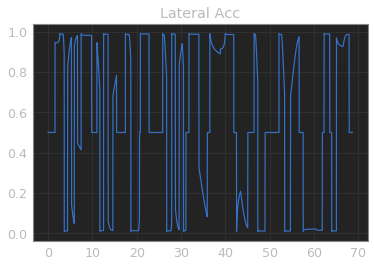

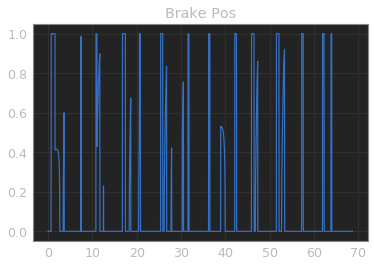

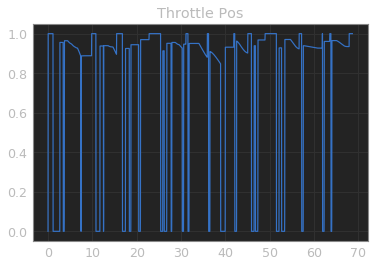

In [22]:
plt.title('Lateral Acc')
plt.plot(time, lat_acc)
plt.show()

plt.title('Brake Pos')
plt.plot(time, brake)
plt.show()

plt.title('Throttle Pos')
plt.plot(time, throttle)
plt.show()

In [23]:
FILE_PATH = 'processed.csv'
with open(FILE_PATH, "w+") as file:
        for i in range(len(time)-1):
            file.write(str(time[i]) + "," + str(position[i]) + "," + str(time[i+1]) + "," + str(position[i+1]) + 
                      "," + str(throttle[i]) + "," + str(lat_acc[i]) + "," + str(brake[i]) + "\n")
#             file.write(str(P.X) + "," + str(P.Y) + "," + str(P.acc) + "\n")